In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from textblob import TextBlob

# Set seaborn style for better visuals
sns.set(style="whitegrid")


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Disseration UON/Datasets/tamil_train.csv")


print(df.head())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics for numerical columns
print(df.describe())


  Hope-Speech\tஉங்கள் பேச்சை எதிர்பார்த்தேன். நல்ல விளக்கம்  அருமை.  நியாயமான முறையில் பதிவு செய்துள்ளீர்கள்.  நீண்ட காலம் வாழ்வதற்கு வாழ்த்துக்கள்.
0  None-of-the-above\tஎச். ராசாவால் இராமருக்கே  இ...                                                                                                
1  None-of-the-above\tகல்யாணம்னு  வரும்போது தான் ...                                                                                                
2  None-of-the-above\tTentu Kottai ஐயா நான் தமிழ்...                                                                                                
3  Homophobia\tTamil selvan  அடே தேவடியாவுக்கு பி...                                                                                                
4  None-of-the-above\tbro நீங்க பேசறதெல்லாம் கேக்...                                                                                                
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 1 columns):


In [ ]:
# Attempt to load with tab delimiter
df_train_orig = pd.read_csv("/content/drive/MyDrive/Disseration UON/Datasets/tamil_train.csv", sep="\t", names=["class", "comments"])

# Display the first few rows to inspect
df.head()


,Hope-Speech\tஉங்கள் பேச்சை எதிர்பார்த்தேன். நல்ல விளக்கம் அருமை. நியாயமான முறையில் பதிவு செய்துள்ளீர்கள். நீண்ட காலம் வாழ்வதற்கு வாழ்த்துக்கள்.
0,None-of-the-above\tஎச். ராசாவால் இராமருக்கே இ...
1,None-of-the-above\tகல்யாணம்னு வரும்போது தான் ...
2,None-of-the-above\tTentu Kottai ஐயா நான் தமிழ்...
3,Homophobia\tTamil selvan அடே தேவடியாவுக்கு பி...
4,None-of-the-above\tbro நீங்க பேசறதெல்லாம் கேக்...


<ipython-input-12-c1bd2f688a69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_train_orig, palette='viridis')


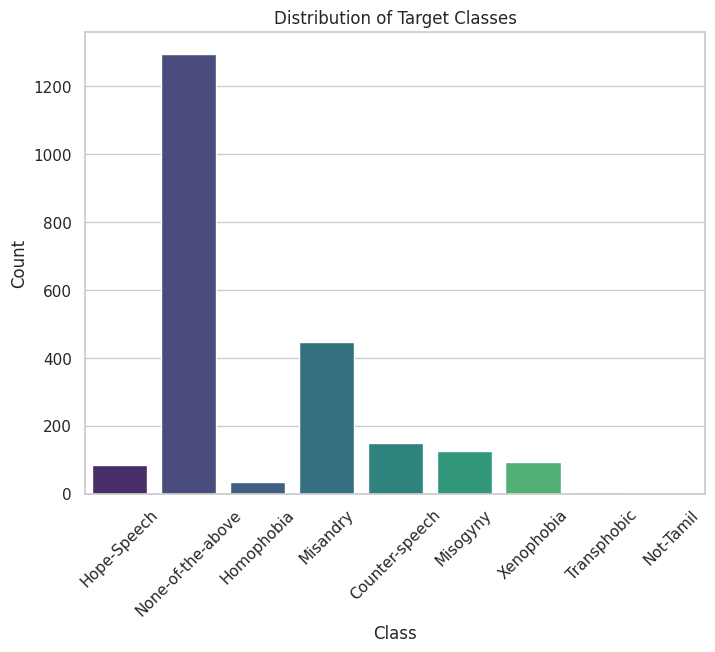

class
None-of-the-above    57.857143
Misandry             19.910714
Counter-speech        6.651786
Misogyny              5.580357
Xenophobia            4.241071
Hope-Speech           3.839286
Homophobia            1.562500
Transphobic           0.267857
Not-Tamil             0.089286
Name: proportion, dtype: float64


In [ ]:
# Analyze Target Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df_train_orig, palette='viridis')
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Show class distribution in percentage
class_distribution = df_train_orig['class'].value_counts(normalize=True) * 100
print(class_distribution)


In [ ]:
import re


def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)

def preprocessing(text):
    text = re.sub(r'@\S+', '', text)  # Remove @mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs starting with http
    text = re.sub(r'www\S+', '', text)  # Remove URLs starting with www
    text = re.sub(r'#\S+', '', text)  # Remove hashtags
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r' +', ' ', text).strip()  # Remove extra spaces and strip text
    text = remove_emoji(text)  # Remove emojis using the custom function
    return text

# Apply preprocessing to the 'comments' column
df_train_orig['clean_text'] = df_train_orig['comments'].apply(preprocessing)


In [ ]:
print(df_train_orig['clean_text'].head(10))


0    உங்கள் பேச்சை எதிர்பார்த்தேன். நல்ல விளக்கம் அ...
1    எச். ராசாவால் இராமருக்கே இழிவு. இவர் எல்லாம் இ...
2    கல்யாணம்னு வரும்போது தான் சாதி முக்கியம் எங்கள...
3                   tentu kottai ஐயா நான் தமிழ் இந்து.
4    tamil selvan அடே தேவடியாவுக்கு பிரந்தவனே பச்சத...
5    bro நீங்க பேசறதெல்லாம் கேக்க கேக்க இரவு துக்கம...
6    s_1 b_2 narmada.d  பெற்ற பிள்ளையை படிக்க வைத்த...
7    பாஜக மற்றும் அது சார்ந்த அமைப்புகள் இந்து மற்ற...
8                                 தேவிடியா; பயா h raja
9    +பிரபல நாட்டாமை என் வீட்டுக்கு வா சுண்ணி ஊம்பி...
Name: clean_text, dtype: object


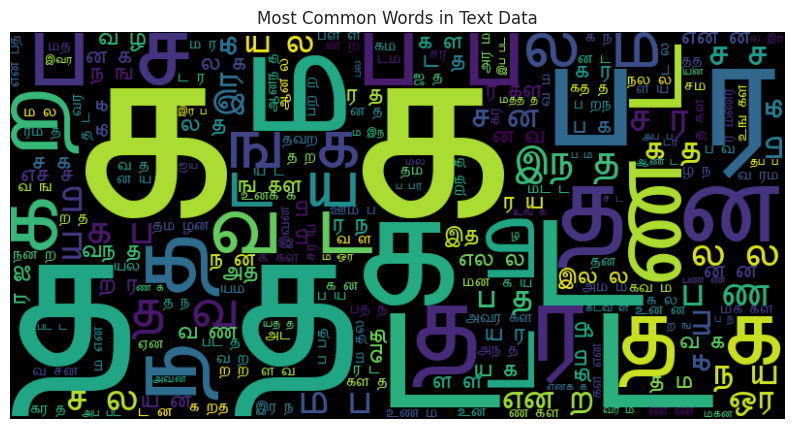

In [ ]:
tamil_font_path = '/content/drive/MyDrive/Disseration UON/Datasets/Latha.ttf'

# Generate the word cloud with the specified font
wordcloud = WordCloud(width=800, height=400, background_color='black', font_path=tamil_font_path).generate(all_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Text Data')
plt.axis('off')
plt.show()


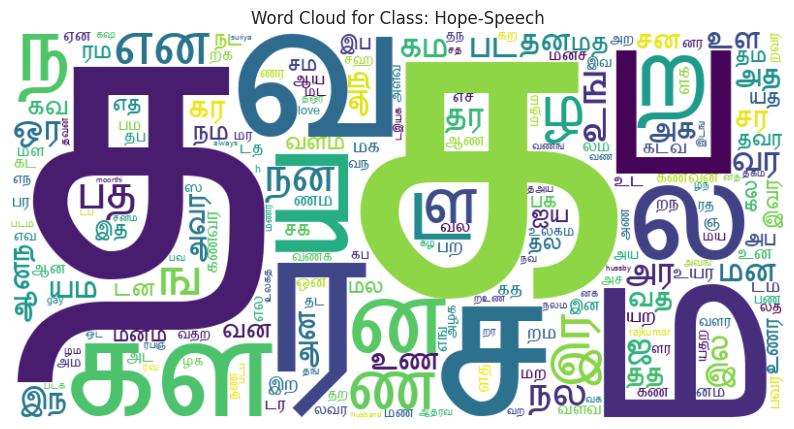

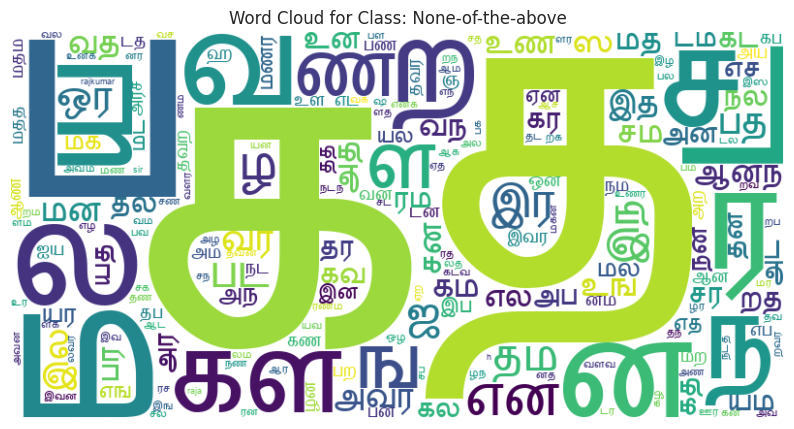

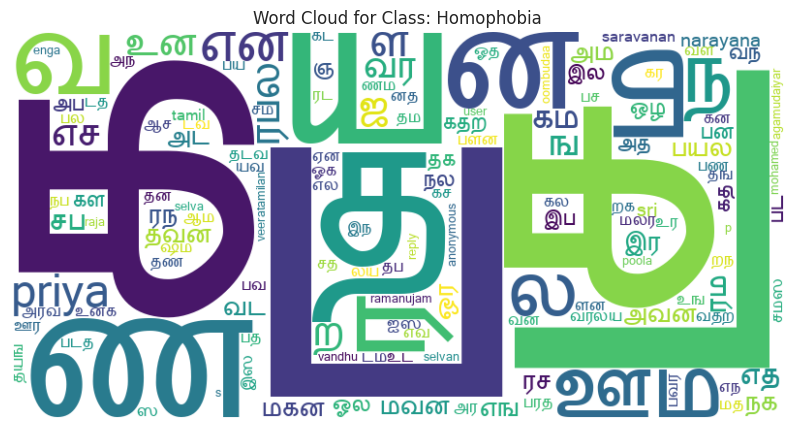

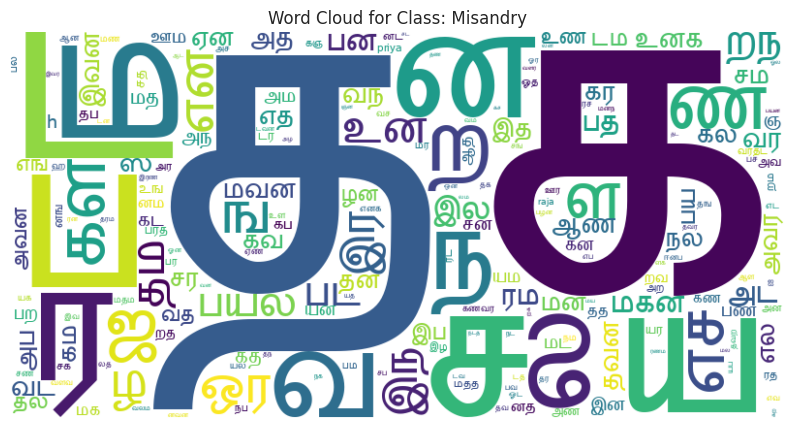

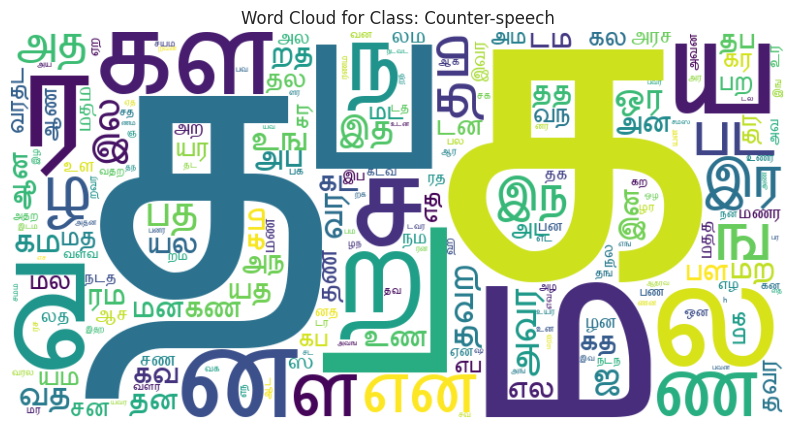

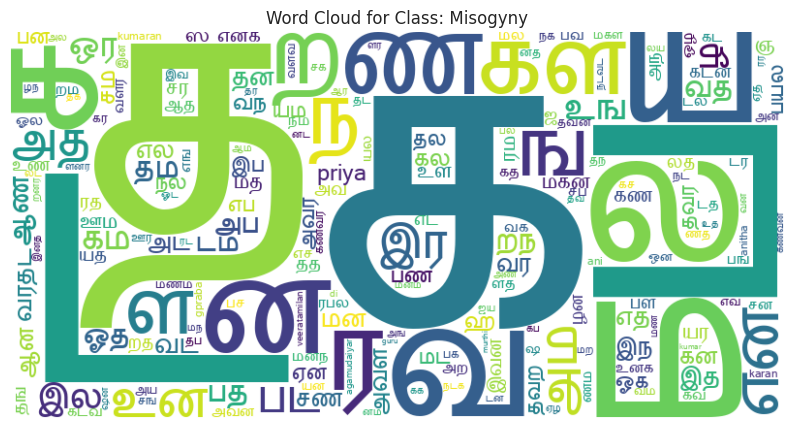

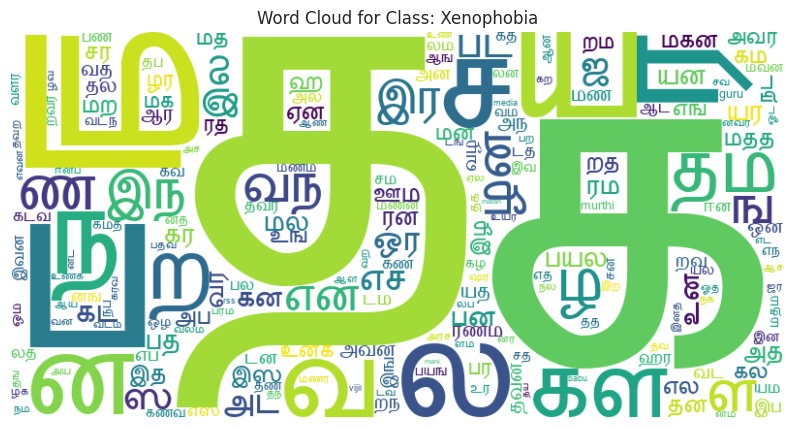

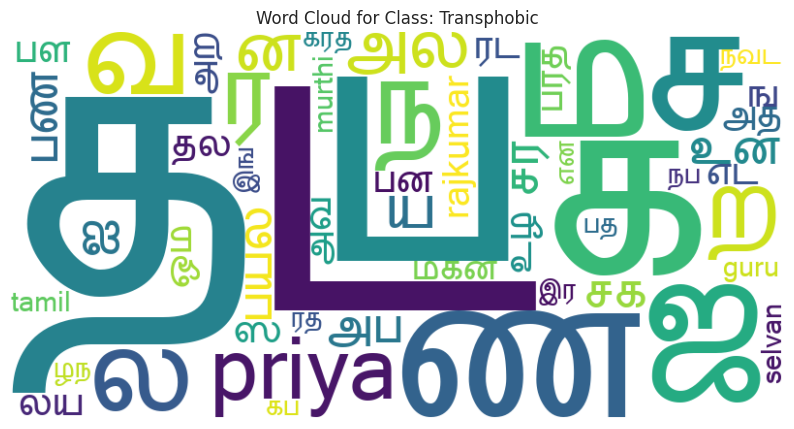

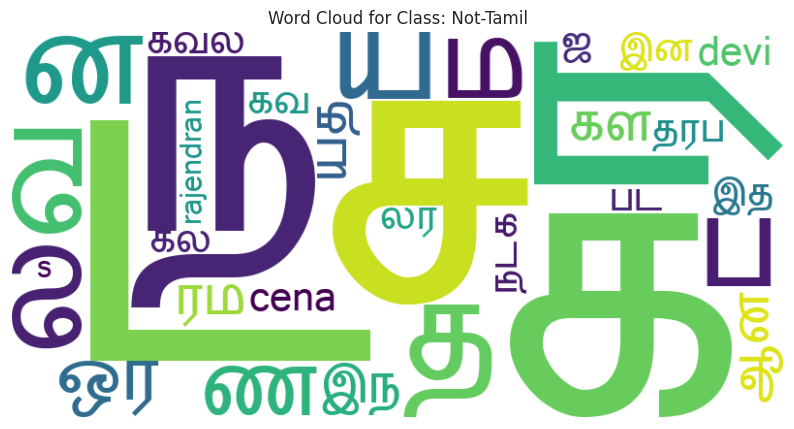

In [ ]:
#Word Distribution by Class


from wordcloud import WordCloud

def plot_wordcloud_by_class(class_label):
    subset = df_train_orig[df_train_orig['class'] == class_label]
    text = ' '.join(subset['clean_text'].tolist())

    # Adjust WordCloud settings to handle Tamil text better
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path=tamil_font_path,  # Ensure this path is correct
        collocations=False
    ).generate(text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Class: {class_label}')
    plt.axis('off')
    plt.show()

# Plot word clouds for each class
for label in df_train_orig['class'].unique():
    plot_wordcloud_by_class(label)



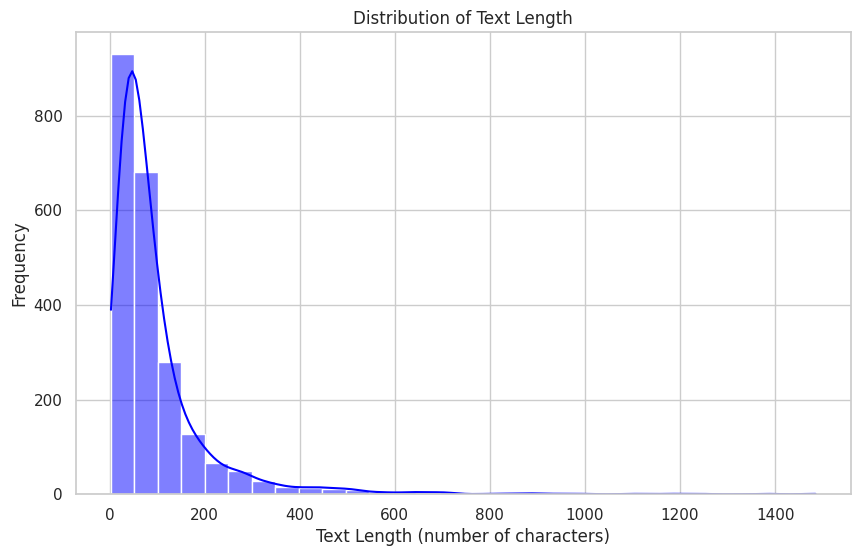

In [ ]:
# Text Length Distribution by Characters

# Calculate the length of each text entry
df_train_orig['text_length'] = df_train_orig['clean_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df_train_orig['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.show()




<ipython-input-30-881c362b3b14>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='text_length', data=df_train_orig, palette='viridis')


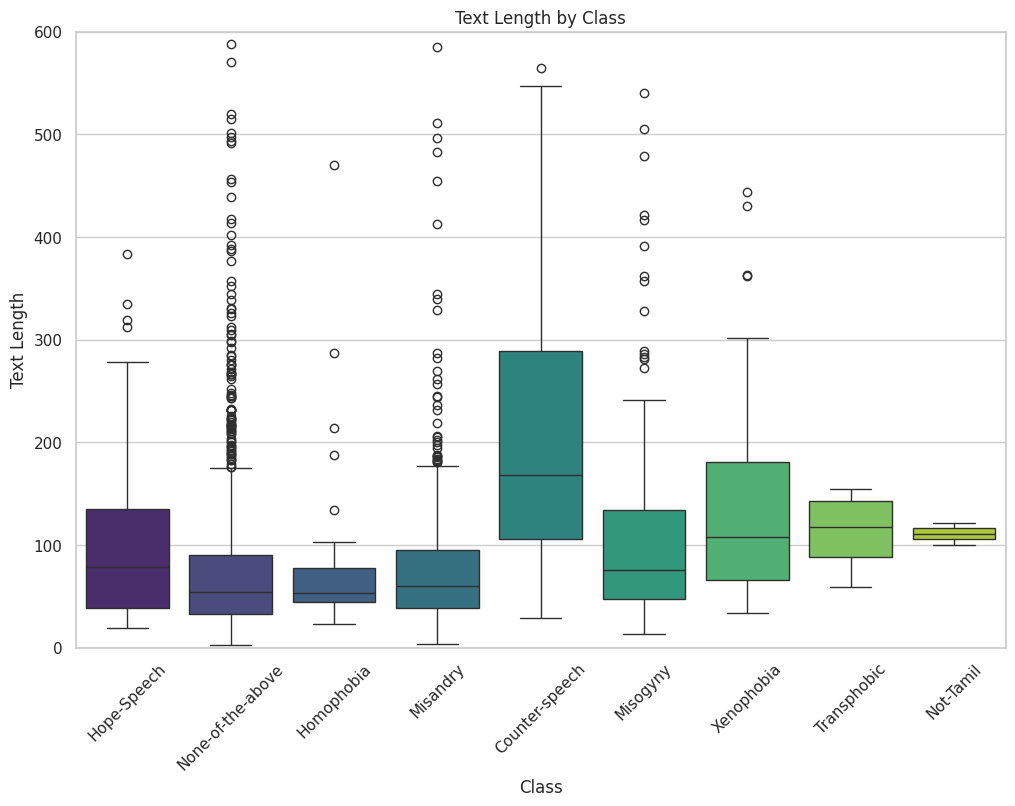

In [ ]:
# Text Length Distribution by Class


# Calculate the length of each text entry
df_train_orig['text_length'] = df_train_orig['clean_text'].apply(len)

plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='text_length', data=df_train_orig, palette='viridis')

# Rotating X-axis labels
plt.xticks(rotation=45)

# Improve Y-axis limits if necessary
plt.ylim(0, 600)

plt.title('Text Length by Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()


In [ ]:
# Tokenization and N-gram Generation

from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def generate_ngrams(text, n):
    tokens = [token for token in text.split() if token != ""]
    n_grams = list(ngrams(tokens, n))
    return [' '.join(grams) for grams in n_grams]

# Generate bigrams and trigrams
df_train_orig['bigrams'] = df_train_orig['clean_text'].apply(lambda x: generate_ngrams(x, 2))
df_train_orig['trigrams'] = df_train_orig['clean_text'].apply(lambda x: generate_ngrams(x, 3))

# Flatten the list of bigrams and trigrams and count frequency
all_bigrams = [bigram for sublist in df_train_orig['bigrams'] for bigram in sublist]
all_trigrams = [trigram for sublist in df_train_orig['trigrams'] for trigram in sublist]

bigram_freq = Counter(all_bigrams)
trigram_freq = Counter(all_trigrams)

# Display the most common bigrams and trigrams
most_common_bigrams = bigram_freq.most_common(20)
most_common_trigrams = trigram_freq.most_common(20)

# Convert to DataFrame for plotting
bigram_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])
trigram_df = pd.DataFrame(most_common_trigrams, columns=['Trigram', 'Frequency'])


<ipython-input-39-10275ec51ccb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='magma')


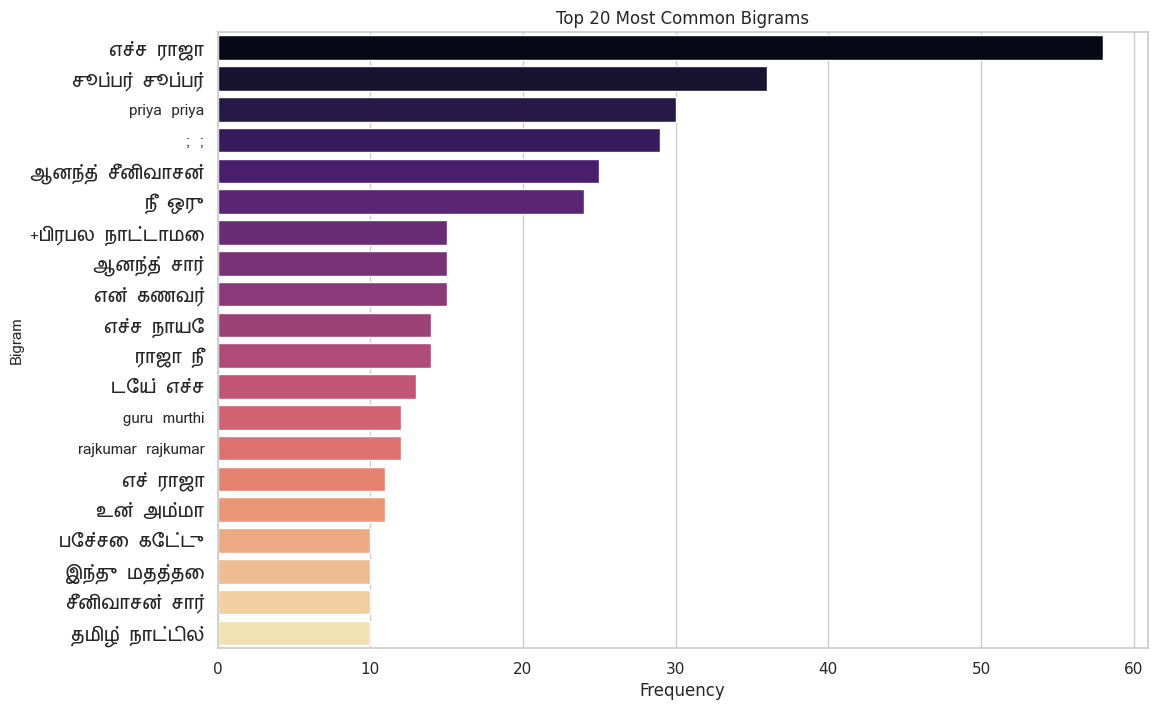

<ipython-input-39-10275ec51ccb>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='magma')


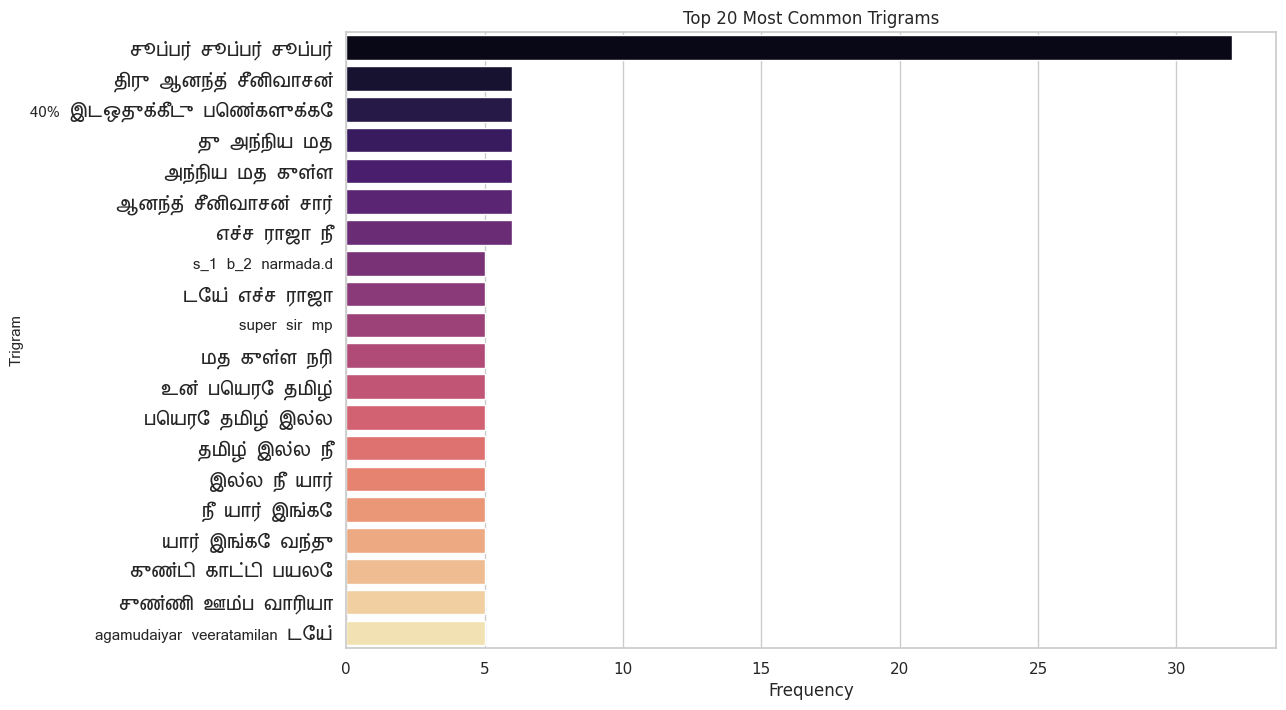

In [ ]:
# Bigram and Trigram Analysis

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your Tamil font
tamil_font_path = '/content/drive/MyDrive/Disseration UON/Datasets/Latha.ttf'

# Load the font properties
tamil_font = fm.FontProperties(fname=tamil_font_path)

# Plot the top 20 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='magma')
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram', fontproperties=tamil_font)
plt.yticks(fontproperties=tamil_font)  # Apply the Tamil font to y-tick labels
plt.show()

# Plot the top 20 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='magma')
plt.title('Top 20 Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram', fontproperties=tamil_font)
plt.yticks(fontproperties=tamil_font)  # Apply the Tamil font to y-tick labels
plt.show()
